#**Lab 9**

#**Roll No : J078**

**EXPERIMENT 9**

Aim: Classification of UCI ML Repository data using machine learning models

Objectives:

1. Download from UCI ML Repository data
2. Perform classification on given dataset
3. Perform error analysis
4. Select correct architecture for maximum accuracy on cross validation and test set
5. Plot learning curves
6. List hyper-parameters used 


**Audit Data Data Set**

**Data Set Information:**

The goal of the research is to help the auditors by building a classification model that can predict the fraudulent firm on the basis the present and historical risk factors. The information about the sectors and the counts of firms are listed respectively as Irrigation (114), Public Health (77), Buildings and Roads (82), Forest (70), Corporate (47), Animal Husbandry (95), Communication (1), Electrical (4), Land (5), Science and Technology (3), Tourism (1), Fisheries (41), Industries (37), Agriculture (200).

In [82]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn import linear_model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

np.random.seed(27)

In [83]:
audit = pd.read_csv("/content/audit_risk.csv")
trial = pd.read_csv("/content/trial.csv")

In [84]:
audit.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,1.0,3.38,0.2,0.676,2,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,1.0,0.94,0.2,0.188,2,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,0.6,3.6,11.75,0.6,7.050,2,0.2,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [85]:
trial.head()

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0


In [86]:
audit.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,775.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,1.152964,14.137631,0.290979,8.265434,2.505155,0.206186,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,0.537417,66.606519,0.159745,39.970849,1.228678,0.037508,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,1.000000,0.090000,0.200000,0.018000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,1.000000,5.595000,0.400000,2.235000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,5.400000,935.030000,0.600000,561.018000,6.000000,0.600000,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


In [87]:
trial.describe()

,Sector_score,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,775.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,20.184536,2.450194,3.512887,10.799988,3.131443,13.218481,5.067655,2.237113,14.137631,2.909794,2.505155,0.029639,2.061856,0.104381,2.167526,2.702577,0.626289
std,24.319017,5.678870,1.740549,50.083624,1.698042,51.312829,0.264449,0.803517,66.606519,1.597452,1.228678,0.184280,0.375080,0.531031,0.679869,0.858923,0.484100
min,1.850000,0.000000,2.000000,0.000000,2.000000,0.000000,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
25%,2.370000,0.210000,2.000000,0.000000,2.000000,0.537500,5.000000,2.000000,0.000000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.000000,0.000000
50%,3.890000,0.875000,2.000000,0.405000,2.000000,1.370000,5.000000,2.000000,0.090000,2.000000,2.000000,0.000000,2.000000,0.000000,2.000000,2.400000,1.000000
75%,55.570000,2.480000,6.000000,4.160000,4.000000,7.707500,5.000000,2.000000,5.595000,4.000000,2.000000,0.000000,2.000000,0.000000,2.000000,3.250000,1.000000
max,59.850000,85.000000,6.000000,1264.630000,6.000000,1268.910000,9.000000,6.000000,935.030000,6.000000,6.000000,2.000000,6.000000,9.000000,6.000000,5.200000,1.000000


In [88]:
trial.columns = ['Sector_score','LOCATION_ID', 'PARA_A', 'Score_A', 'PARA_B',
       'Score_B',  'TOTAL', 'numbers', 'Marks',
       'Money_Value', 'MONEY_Marks', 'District',
       'Loss', 'LOSS_SCORE', 'History', 'History_score', 'Score', 'Risk_trial' ]

In [89]:
trial.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,PARA_B,Score_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk_trial
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0


In [90]:
trial['Score_A'] = trial['Score_A']/10
trial['Score_B'] = trial['Score_B']/10

In [91]:
same_columns = np.intersect1d(audit.columns, trial.columns)
same_columns

array(['History', 'LOCATION_ID', 'Money_Value', 'PARA_A', 'PARA_B',
       'Score', 'Score_A', 'Score_B', 'Sector_score', 'TOTAL', 'numbers'],
      dtype=object)

In [92]:
merged_df = pd.merge(audit , trial, how='outer', on = ['History', 'LOCATION_ID', 'Money_Value', 'PARA_A', 'PARA_B',
       'Score', 'Score_A', 'Score_B', 'Sector_score', 'TOTAL', 'numbers'])
merged_df.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk', 'Marks', 'MONEY_Marks',
       'District', 'Loss', 'LOSS_SCORE', 'History_score', 'Risk_trial'],
      dtype='object')

In [93]:
merged_df.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score,Risk_trial
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,1.0,3.38,0.2,0.676,2,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1,2,2,2,0,2,2,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,1.0,0.94,0.2,0.188,2,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0,2,2,2,0,2,2,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0,2,2,2,0,2,2,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,0.6,3.6,11.75,0.6,7.050,2,0.2,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1,6,6,2,0,2,2,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0,2,2,2,0,2,2,0


risk_trial and risk columns are same

In [94]:
df = merged_df.drop(['Risk_trial'], axis = 1)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810 entries, 0 to 809
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    810 non-null    float64
 1   LOCATION_ID     810 non-null    object 
 2   PARA_A          810 non-null    float64
 3   Score_A         810 non-null    float64
 4   Risk_A          810 non-null    float64
 5   PARA_B          810 non-null    float64
 6   Score_B         810 non-null    float64
 7   Risk_B          810 non-null    float64
 8   TOTAL           810 non-null    float64
 9   numbers         810 non-null    float64
 10  Score_B.1       810 non-null    float64
 11  Risk_C          810 non-null    float64
 12  Money_Value     809 non-null    float64
 13  Score_MV        810 non-null    float64
 14  Risk_D          810 non-null    float64
 15  District_Loss   810 non-null    int64  
 16  PROB            810 non-null    float64
 17  RiSk_E          810 non-null    flo

In [96]:
df.columns[df.isnull().any()]

Index(['Money_Value'], dtype='object')

In [97]:
df.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
Marks             0
MONEY_Marks       0
District          0
Loss              0
LOSS_SCORE        0
History_score     0
dtype: int64

In [98]:
df['Money_Value'].describe()

count    809.000000
mean      13.543466
std       65.251851
min        0.000000
25%        0.000000
50%        0.050000
75%        4.950000
max      935.030000
Name: Money_Value, dtype: float64

In [99]:
df['Money_Value'] = df['Money_Value'].fillna(df['Money_Value'].median())

In [100]:
df.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,1.0,3.38,0.2,0.676,2,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1,2,2,2,0,2,2
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,1.0,0.94,0.2,0.188,2,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0,2,2,2,0,2,2
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0,2,2,2,0,2,2
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,0.6,3.6,11.75,0.6,7.050,2,0.2,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1,6,6,2,0,2,2
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0,2,2,2,0,2,2


In [101]:
df.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
count,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.0,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000
mean,21.406716,2.348556,0.344938,1.294561,10.347643,0.308395,6.068334,12.665829,5.064815,0.222716,1.146543,13.526807,0.287160,7.918490,2.493827,0.205926,0.516049,0.100000,0.216049,0.051358,2.674074,16.999643,0.567407,0.5,6.881682,0.379012,2.227160,2.871605,2.493827,0.028395,2.059259,2.160494
std,24.760476,5.579501,0.173042,3.378180,49.067564,0.167741,29.461510,50.292444,0.259188,0.078789,0.526897,65.213233,0.157414,39.157042,1.219166,0.036732,0.287118,0.520174,0.066628,0.299533,0.851869,53.676423,0.437573,0.0,37.871031,0.485441,0.787889,1.574145,1.219166,0.180464,0.367323,0.666277
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
25%,2.370000,0.070000,0.200000,0.014000,0.000000,0.200000,0.000000,0.430000,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.564500,0.400000,0.5,0.312900,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
50%,3.890000,0.820000,0.200000,0.164000,0.335000,0.200000,0.067000,1.290000,5.000000,0.200000,1.000000,0.050000,0.200000,0.010000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.200000,2.116000,0.400000,0.5,0.470800,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
75%,55.570000,2.397500,0.600000,1.438500,2.985000,0.400000,1.347000,7.337500,5.000000,0.200000,1.000000,4.862500,0.200000,0.972500,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,3.200000,9.210500,0.400000,0.5,2.882700,1.000000,2.000000,2.000000,2.000000,0.000000,2.000000,2.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,5.400000,935.030000,0.600000,561.018000,6.000000,0.600000,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000,6.000000,6.000000,6.000000,2.000000,6.000000,6.000000


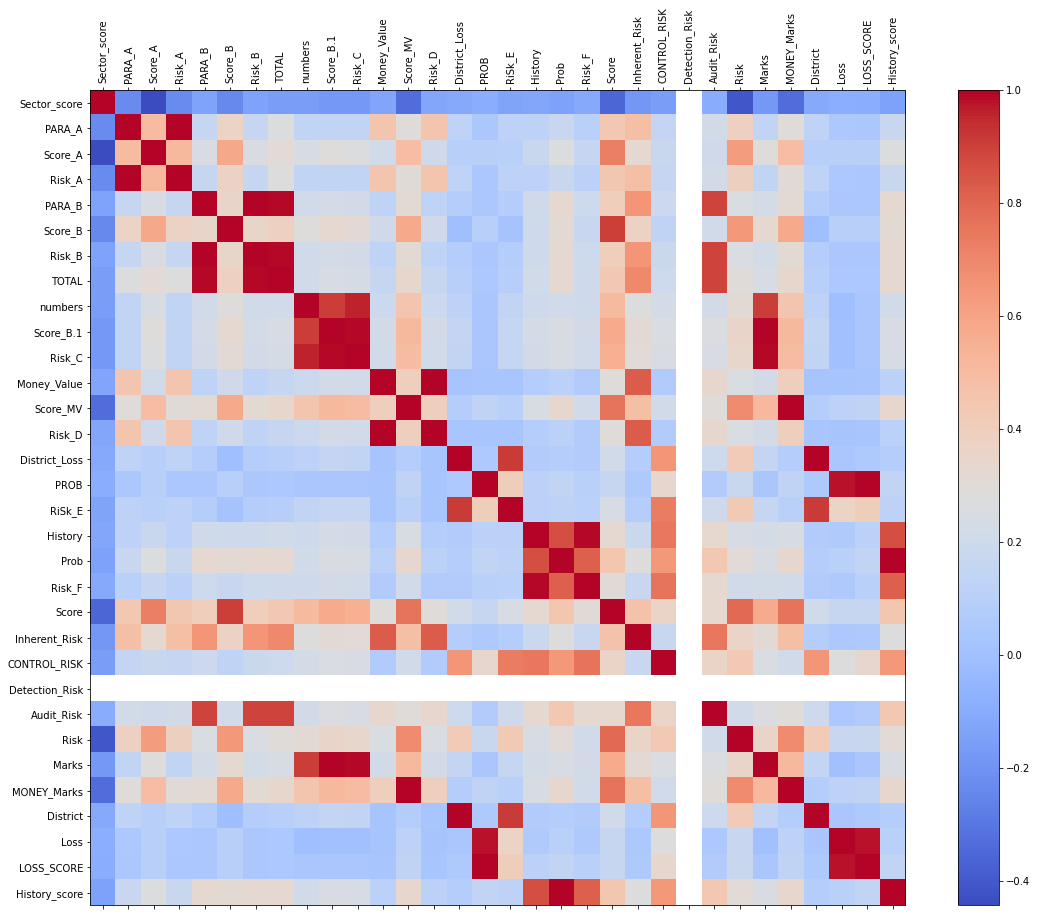

In [102]:
corr= df.corr()
fig = plt.figure(figsize=(19, 15))
ax = fig.add_subplot()
cax = ax.matshow(corr, cmap='coolwarm')
fig.colorbar(cax)
ticks = np.arange(0,len(corr.columns),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.xticks(rotation=90)
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
plt.show()

In [103]:
df = df.drop(['Detection_Risk', 'Risk_F'], axis = 1) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 810 entries, 0 to 809
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   810 non-null    float64
 1   LOCATION_ID    810 non-null    object 
 2   PARA_A         810 non-null    float64
 3   Score_A        810 non-null    float64
 4   Risk_A         810 non-null    float64
 5   PARA_B         810 non-null    float64
 6   Score_B        810 non-null    float64
 7   Risk_B         810 non-null    float64
 8   TOTAL          810 non-null    float64
 9   numbers        810 non-null    float64
 10  Score_B.1      810 non-null    float64
 11  Risk_C         810 non-null    float64
 12  Money_Value    810 non-null    float64
 13  Score_MV       810 non-null    float64
 14  Risk_D         810 non-null    float64
 15  District_Loss  810 non-null    int64  
 16  PROB           810 non-null    float64
 17  RiSk_E         810 non-null    float64
 18  History   

In [104]:
df["LOCATION_ID"].nunique()

45

In [105]:
df["LOCATION_ID"].unique()

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 'LOHARU', 'NUH', 'SAFIDON', '43',
       '44', '17'], dtype=object)

In [106]:
df = df[(df.LOCATION_ID != 'LOHARU')]
df = df[(df.LOCATION_ID != 'NUH')]
df = df[(df.LOCATION_ID != 'SAFIDON')]
df = df.astype(float)
print("Updated number of rows in the dataset: ",len(df))

Updated number of rows in the dataset:  807


In [107]:
df = df.drop_duplicates(keep = 'first')
print("Updated number of rows in the dataset: ",len(df))

for i in range(0, len(df.columns)):
    print(df.columns[i], ":", df.iloc[:,i].nunique())

Updated number of rows in the dataset:  760
Sector_score : 13
LOCATION_ID : 42
PARA_A : 362
Score_A : 3
Risk_A : 362
PARA_B : 358
Score_B : 3
Risk_B : 360
TOTAL : 470
numbers : 5
Score_B.1 : 3
Risk_C : 5
Money_Value : 327
Score_MV : 3
Risk_D : 327
District_Loss : 3
PROB : 3
RiSk_E : 5
History : 7
Prob : 3
Score : 17
Inherent_Risk : 583
CONTROL_RISK : 11
Audit_Risk : 600
Risk : 2
Marks : 3
MONEY_Marks : 3
District : 3
Loss : 3
LOSS_SCORE : 3
History_score : 3


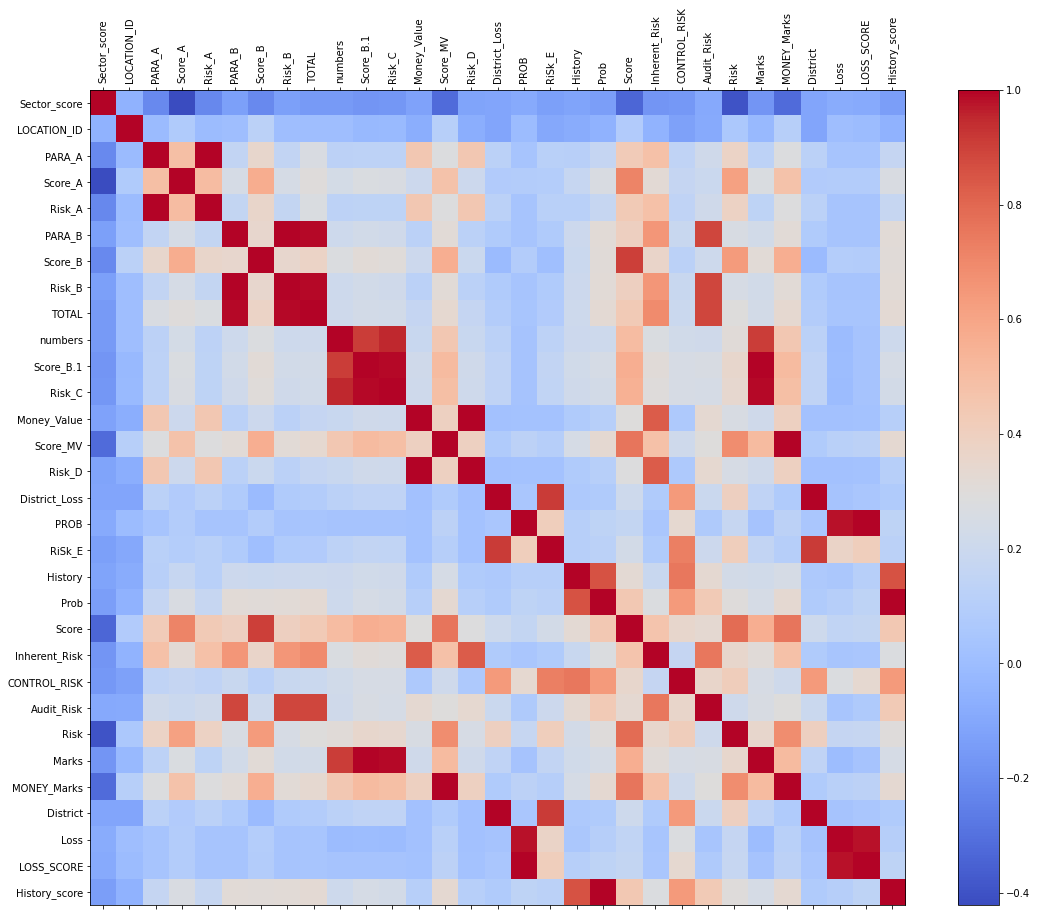

In [108]:
corr= df.corr()
fig = plt.figure(figsize=(19, 15))
ax = fig.add_subplot()
cax = ax.matshow(corr, cmap='coolwarm')
fig.colorbar(cax)
ticks = np.arange(0,len(corr.columns),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.xticks(rotation=90)
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
plt.show()

In [109]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
cm = sns.diverging_palette(220, 20, sep=20, as_cmap=True) 
corr.style.background_gradient(cmap=cm).set_precision(2)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Score,Inherent_Risk,CONTROL_RISK,Audit_Risk,Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
Sector_score,1.00,-0.05,-0.21,-0.42,-0.22,-0.13,-0.21,-0.13,-0.15,-0.15,-0.17,-0.16,-0.12,-0.32,-0.11,-0.11,-0.09,-0.13,-0.11,-0.14,-0.33,-0.17,-0.16,-0.09,-0.39,-0.17,-0.32,-0.11,-0.08,-0.09,-0.14
LOCATION_ID,-0.05,1.00,-0.01,0.08,-0.00,0.01,0.13,0.01,0.01,0.01,-0.02,-0.02,-0.07,0.11,-0.07,-0.11,-0.00,-0.10,-0.08,-0.05,0.09,-0.05,-0.12,-0.09,0.06,-0.02,0.11,-0.11,0.01,-0.00,-0.05
PARA_A,-0.21,-0.01,1.00,0.49,1.00,0.16,0.36,0.16,0.27,0.13,0.14,0.14,0.45,0.28,0.45,0.13,0.04,0.12,0.12,0.17,0.42,0.48,0.15,0.22,0.38,0.14,0.28,0.13,0.04,0.04,0.17
Score_A,-0.42,0.08,0.49,1.00,0.50,0.25,0.57,0.25,0.30,0.24,0.27,0.26,0.20,0.47,0.20,0.09,0.09,0.10,0.18,0.26,0.72,0.32,0.17,0.20,0.62,0.27,0.47,0.09,0.09,0.09,0.26
Risk_A,-0.22,-0.00,1.00,0.50,1.00,0.16,0.36,0.16,0.27,0.13,0.14,0.14,0.45,0.29,0.45,0.13,0.04,0.12,0.12,0.17,0.43,0.48,0.15,0.22,0.38,0.14,0.29,0.13,0.04,0.04,0.17
PARA_B,-0.13,0.01,0.16,0.25,0.16,1.00,0.35,1.00,0.99,0.21,0.23,0.22,0.12,0.31,0.12,0.08,0.04,0.08,0.20,0.32,0.40,0.65,0.19,0.89,0.26,0.23,0.31,0.08,0.04,0.04,0.32
Score_B,-0.21,0.13,0.36,0.57,0.36,0.35,1.00,0.35,0.38,0.28,0.31,0.30,0.20,0.56,0.20,-0.01,0.09,0.01,0.20,0.31,0.90,0.36,0.12,0.21,0.63,0.31,0.56,-0.01,0.10,0.09,0.31
Risk_B,-0.13,0.01,0.16,0.25,0.16,1.00,0.35,1.00,0.99,0.21,0.23,0.22,0.12,0.31,0.12,0.08,0.04,0.08,0.20,0.32,0.40,0.65,0.19,0.89,0.25,0.23,0.31,0.08,0.04,0.04,0.32
TOTAL,-0.15,0.01,0.27,0.30,0.27,0.99,0.38,0.99,1.00,0.22,0.24,0.23,0.17,0.34,0.17,0.09,0.05,0.09,0.21,0.33,0.43,0.69,0.20,0.89,0.29,0.24,0.34,0.09,0.05,0.05,0.33
numbers,-0.15,0.01,0.13,0.24,0.13,0.21,0.28,0.21,0.22,1.00,0.91,0.96,0.19,0.45,0.19,0.12,0.03,0.14,0.20,0.21,0.50,0.27,0.23,0.22,0.31,0.91,0.45,0.12,-0.00,0.03,0.21


Eg Para A and Risk A has high correlation 

In [110]:
#Keeping just the columns that are correlated with the target variable and not with other independent variables.
df = df[['Risk_A', 'Risk_B', 'Risk_C', 'Risk_D','RiSk_E', 'Prob', 'Score', 'CONTROL_RISK',
        'Audit_Risk', 'Risk', 'MONEY_Marks', 'Loss']]
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
cm = sns.diverging_palette(220, 20, sep=20, as_cmap=True) 
corr.style.background_gradient(cmap=cm).set_precision(2)

,Risk_A,Risk_B,Risk_C,Risk_D,RiSk_E,Prob,Score,CONTROL_RISK,Audit_Risk,Risk,MONEY_Marks,Loss
Risk_A,1.00,0.16,0.14,0.45,0.12,0.17,0.43,0.15,0.22,0.38,0.29,0.04
Risk_B,0.16,1.00,0.22,0.12,0.08,0.32,0.40,0.19,0.89,0.25,0.31,0.04
Risk_C,0.14,0.22,1.00,0.21,0.15,0.24,0.55,0.25,0.25,0.34,0.49,0.00
Risk_D,0.45,0.12,0.21,1.00,0.03,0.11,0.29,0.07,0.33,0.25,0.39,0.02
RiSk_E,0.12,0.08,0.15,0.03,1.00,0.12,0.23,0.73,0.20,0.41,0.10,0.37
Prob,0.17,0.32,0.24,0.11,0.12,1.00,0.44,0.64,0.43,0.30,0.33,0.10
Score,0.43,0.40,0.55,0.29,0.23,0.44,1.00,0.35,0.33,0.78,0.76,0.16
CONTROL_RISK,0.15,0.19,0.25,0.07,0.73,0.64,0.35,1.00,0.36,0.41,0.22,0.28
Audit_Risk,0.22,0.89,0.25,0.33,0.20,0.43,0.33,0.36,1.00,0.22,0.29,0.05
Risk,0.38,0.25,0.34,0.25,0.41,0.30,0.78,0.41,0.22,1.00,0.69,0.17


In [111]:
class_df = df.drop("Audit_Risk", axis = 1)

In [112]:
classification_X = class_df.drop(["Risk"], axis = 1)
classification_y = class_df["Risk"]

In [113]:
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(classification_X, classification_y, 
                                                            test_size = 0.25, random_state = 0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train_org)
X_test  = scaler.transform(X_test_org)

In [114]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(lr)

param = {'n_estimators' : [100,500,1000],
        'learning_rate': [0.1, 0.5, 1]}

ada_grid = GridSearchCV(ada, param, cv=5, n_jobs= -1)

ada_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=LogisticRegression(C=1.0,
                                                                            class_weight=None,
                                                                            dual=False,
                                                                            fit_intercept=True,
                                                                            intercept_scaling=1,
                                                                            l1_ratio=None,
                                                                            max_iter=100,
                                                                            multi_class='auto',
                                                                            n_jobs=None,
                                                                            

In [115]:
print("Best Parameters for Adaboost Classifier: ", ada_grid.best_params_)

Best Parameters for Adaboost Classifier:  {'learning_rate': 1, 'n_estimators': 1000}


In [116]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 9, random_state=0)
ada = AdaBoostClassifier(dt, n_estimators= 1000, learning_rate= 1, algorithm="SAMME.R", random_state=0)
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=9,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [117]:
print("Logistic Regression with Adaboost Training Score: ", ada.score(X_train, y_train))
print("Logistic Regression with Adaboost Testing Score: ", ada.score(X_test, y_test))

Logistic Regression with Adaboost Training Score:  1.0
Logistic Regression with Adaboost Testing Score:  0.9789473684210527


Gradient Boosting Classifier

In [118]:
from  sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=0)

param = {'max_depth': [4,5,7,9,11,15],
           'n_estimators': [100, 500, 1000],
           'learning_rate': [0.01,0.1, 0.5, 1.0]}
gb_grid = GridSearchCV(gb, param, cv = 5, return_train_score= True)
gb_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [119]:
print("Best Parameters for Gradient Boosting Classifier: ", gb_grid.best_params_)

Best Parameters for Gradient Boosting Classifier:  {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500}


In [120]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(max_depth=4, n_estimators=100, learning_rate=1.0, random_state=0)
gb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [121]:
print("Gradient Boosting Classifier Training Score: ", gb.score(X_train, y_train))
print("Gradient Boosting Classifier Testing Score: ", gb.score(X_test, y_test))

Gradient Boosting Classifier Training Score:  1.0
Gradient Boosting Classifier Testing Score:  0.9789473684210527




---



---

